In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pd.read_csv('Life_Expectancy.csv')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#Task 1:
#Read the raw data from the source file in Python. 
#Perform feature engineering:
#Population Size – Create a population range that includes three categories:
#Small – a population between 1,000 and 29,999,
#Medium – a population between 30,000 and 99,999, and
#Large - a population of 100,000 or more.
#Lifestyle – Create a lifestyle feature that combines alcohol consumption and BMI.
#Economy – Create an economy feature that combines population and GDP.
#Death Ratio – Determine the death ratio between adult and infant mortality.


In [4]:
Life_expect=pd.read_csv('Life_Expectancy.csv')

In [5]:
#Perform feature engineering
Life_expect['Population Size'] = pd.cut(Life_expect['Population'], bins=[1000, 30000, 100000, np.inf], labels=['Small', 'Medium', 'Large'])

In [6]:
Life_expect['Population'].head()

0    33736494.0
1      327582.0
2    31731688.0
3     3696958.0
4     2978599.0
Name: Population, dtype: float64

In [7]:
Life_expect['Population Size'].head()

0    Large
1    Large
2    Large
3    Large
4    Large
Name: Population Size, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [8]:
#Lifestyle – Create a lifestyle feature that combines alcohol consumption and BMI.
Life_expect.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population Size'],
      dtype='object')

In [9]:
Life_expect['Lifestyle'] = Life_expect['Alcohol'] * Life_expect[' BMI ']
Life_expect['Lifestyle']

0         0.191
1         0.186
2         0.181
3         0.176
4         0.172
         ...   
2933    118.156
2934    108.402
2935    116.509
2936     44.548
2937     42.840
Name: Lifestyle, Length: 2938, dtype: float64

In [10]:
#Economy – Create an economy feature that combines population and GDP.

In [11]:
Life_expect['Economy'] = Life_expect['GDP'] / Life_expect['Population']
Life_expect['Economy']

0       0.000017
1       0.001870
2       0.000020
3       0.000181
4       0.000021
          ...   
2933    0.000036
2934    0.000036
2935    0.000457
2936    0.000044
2937    0.000045
Name: Economy, Length: 2938, dtype: float64

In [12]:
#Death Ratio – Determine the death ratio between adult and infant mortality.

In [13]:
Life_expect['Death Ratio'] = Life_expect['Adult Mortality'] / Life_expect['infant deaths']
Life_expect['Death Ratio']

0        4.241935
1        4.234375
2        4.060606
3        3.942029
4        3.873239
          ...    
2933    26.777778
2934    27.500000
2935     2.920000
2936    27.440000
2937    27.708333
Name: Death Ratio, Length: 2938, dtype: float64

In [14]:
#Task 2:
#Perform data cleaning by either removing any fragmented observations or 
#by imputing missing values as necessary. Generate scatter plots between each predictor with the target variable to
#check the linear relationship and apply data transformations like log transform, if necessary.


In [15]:
Life_expect.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Population Size                    683
Lifestyle                          211
Economy                            674
Death Ratio              

In [16]:
Life_expect.dropna(inplace=True)

In [17]:
Life_expect.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Population Size                    0
Lifestyle                          0
Economy                            0
Death Ratio                        0
dtype: int64

In [18]:
Life_expect.shape

(1624, 26)

In [19]:
Life_expect

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population Size,Lifestyle,Economy,Death Ratio
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Large,0.191,0.000017,4.241935
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Large,0.186,0.001870,4.234375
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Large,0.181,0.000020,4.060606
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Large,0.176,0.000181,3.942029
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Large,0.172,0.000021,3.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,Large,118.156,0.000036,26.777778
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,Large,108.402,0.000036,27.500000
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,57.348340,125525.0,1.2,1.3,0.427,10.0,Large,116.509,0.000457,2.920000
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,Large,44.548,0.000044,27.440000


<Axes: xlabel='Population', ylabel='Life expectancy '>

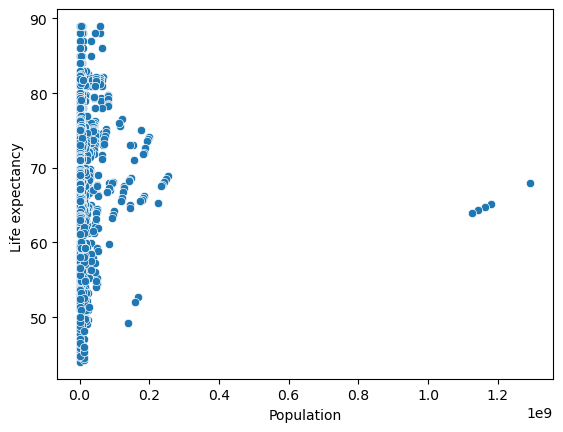

In [20]:
sns.scatterplot(y='Life expectancy ',x='Population',data=Life_expect)

<Axes: xlabel='infant deaths', ylabel='Life expectancy '>

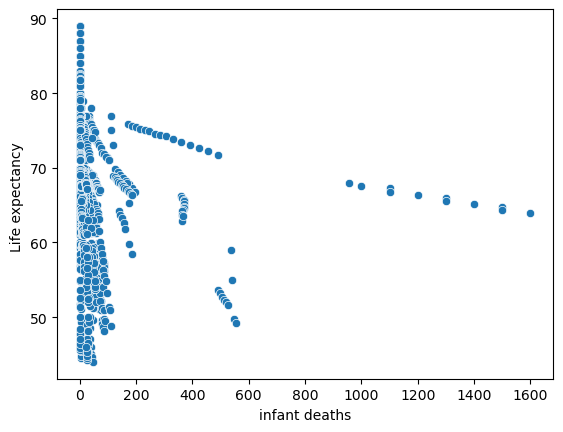

In [21]:
sns.scatterplot(y='Life expectancy ',x='infant deaths',data=Life_expect)

<Axes: xlabel=' HIV/AIDS', ylabel='Life expectancy '>

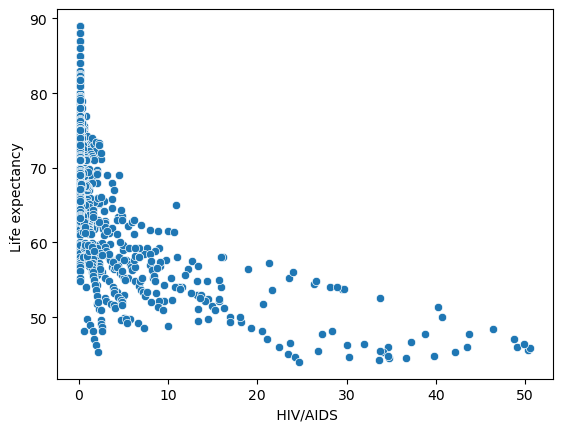

In [22]:
sns.scatterplot(y='Life expectancy ',x=' HIV/AIDS',data=Life_expect)

<Axes: xlabel='Death Ratio', ylabel='Life expectancy '>

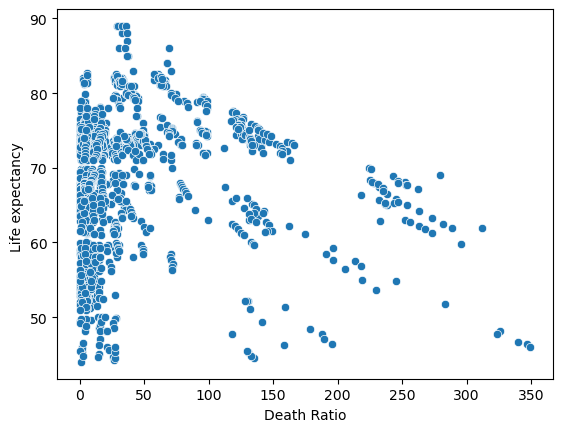

In [23]:
sns.scatterplot(y='Life expectancy ',x='Death Ratio',data=Life_expect)

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

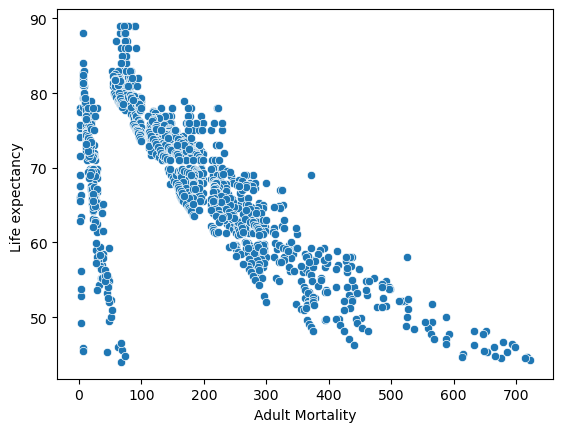

In [24]:
sns.scatterplot(y='Life expectancy ',x='Adult Mortality',data=Life_expect)

In [25]:
#Task 3:
#Generate a correlation heat map to assess
#multicollinearity with the threshold set as 0.75. All variables above 0.75 need to be dropped.


In [26]:
#Encoding and transcribing of the catigorical column

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
#creating an object from the Label Encoding class
Le = LabelEncoder()
Life_expect["Country"] = Le.fit_transform(Life_expect["Country"])

In [29]:
Life_expect["Status"] = Le.fit_transform(Life_expect["Status"])

In [30]:
Life_expect["Population Size"] = Le.fit_transform(Life_expect["Population Size"])

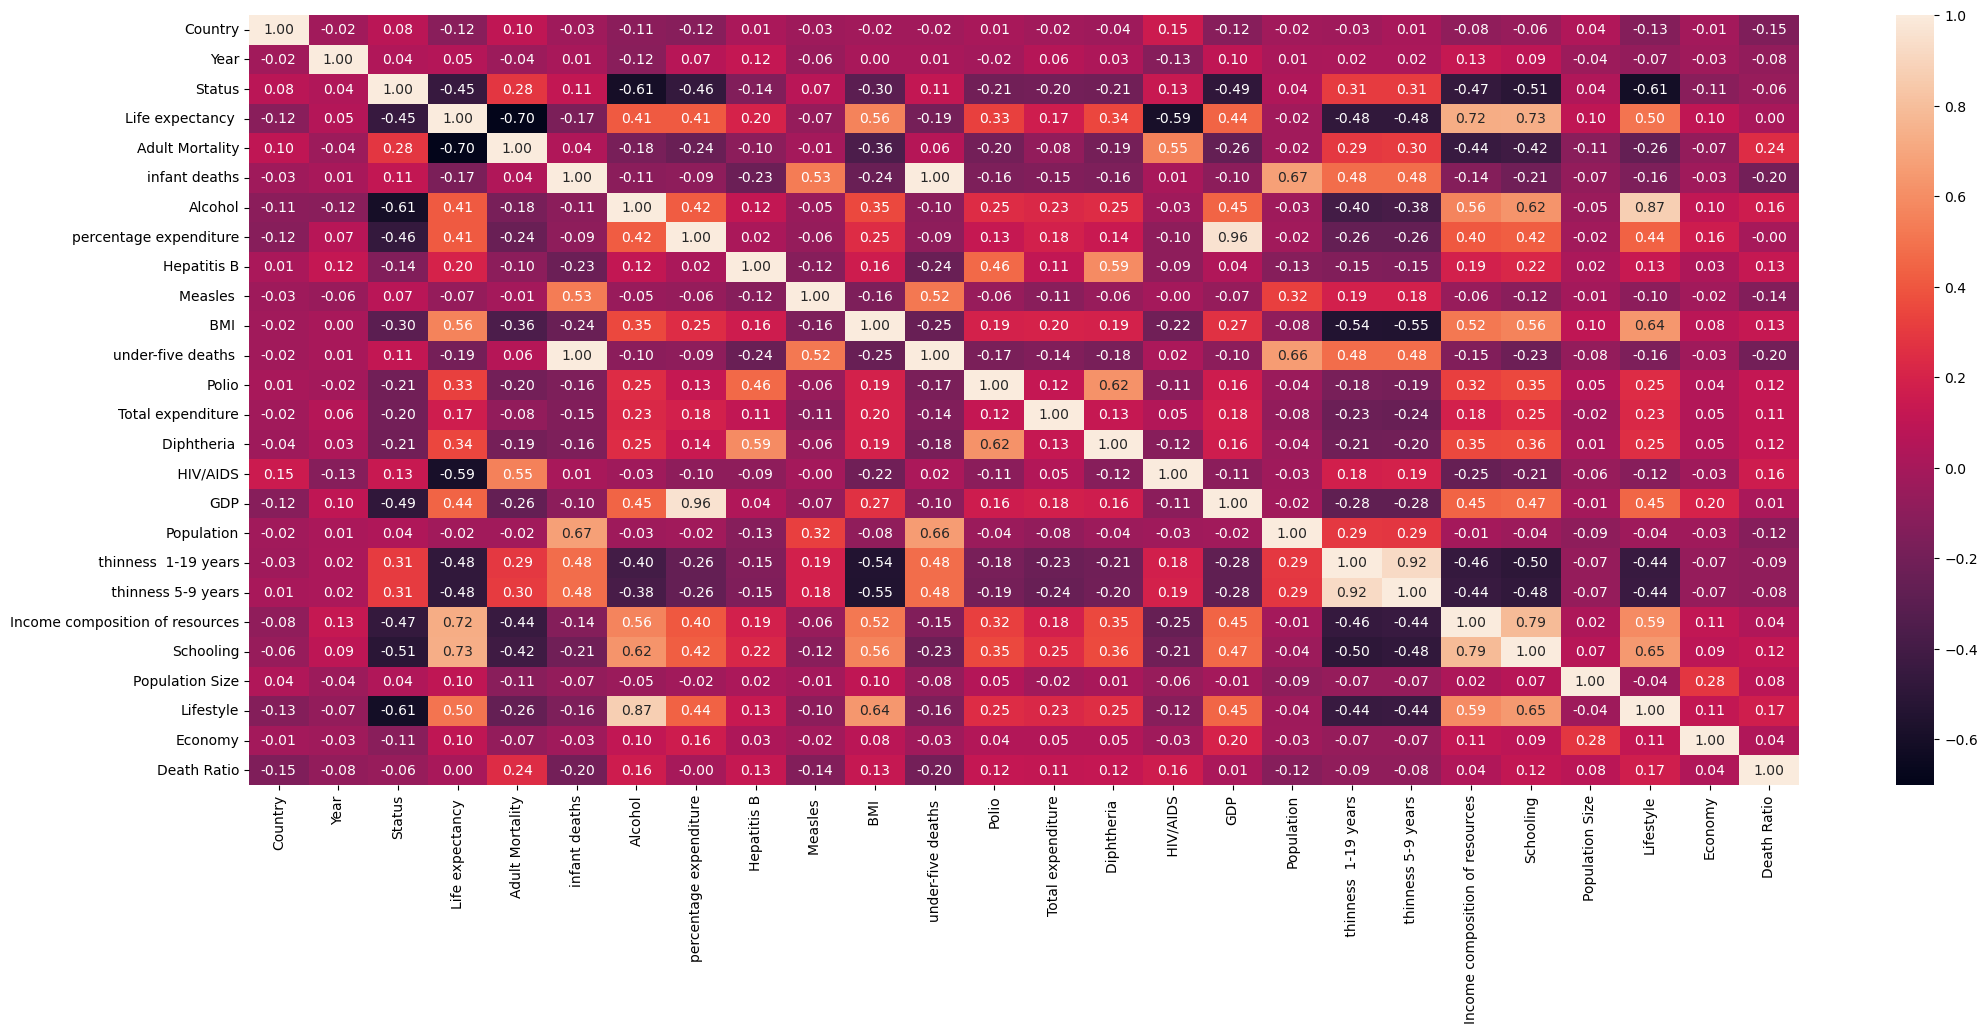

In [31]:
corr = Life_expect.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [32]:
#Task 4:
#Eliminate possible outliers by generating box-whisker plots.
#Removing the outlier for Price
#Trimming and capping


<Axes: >

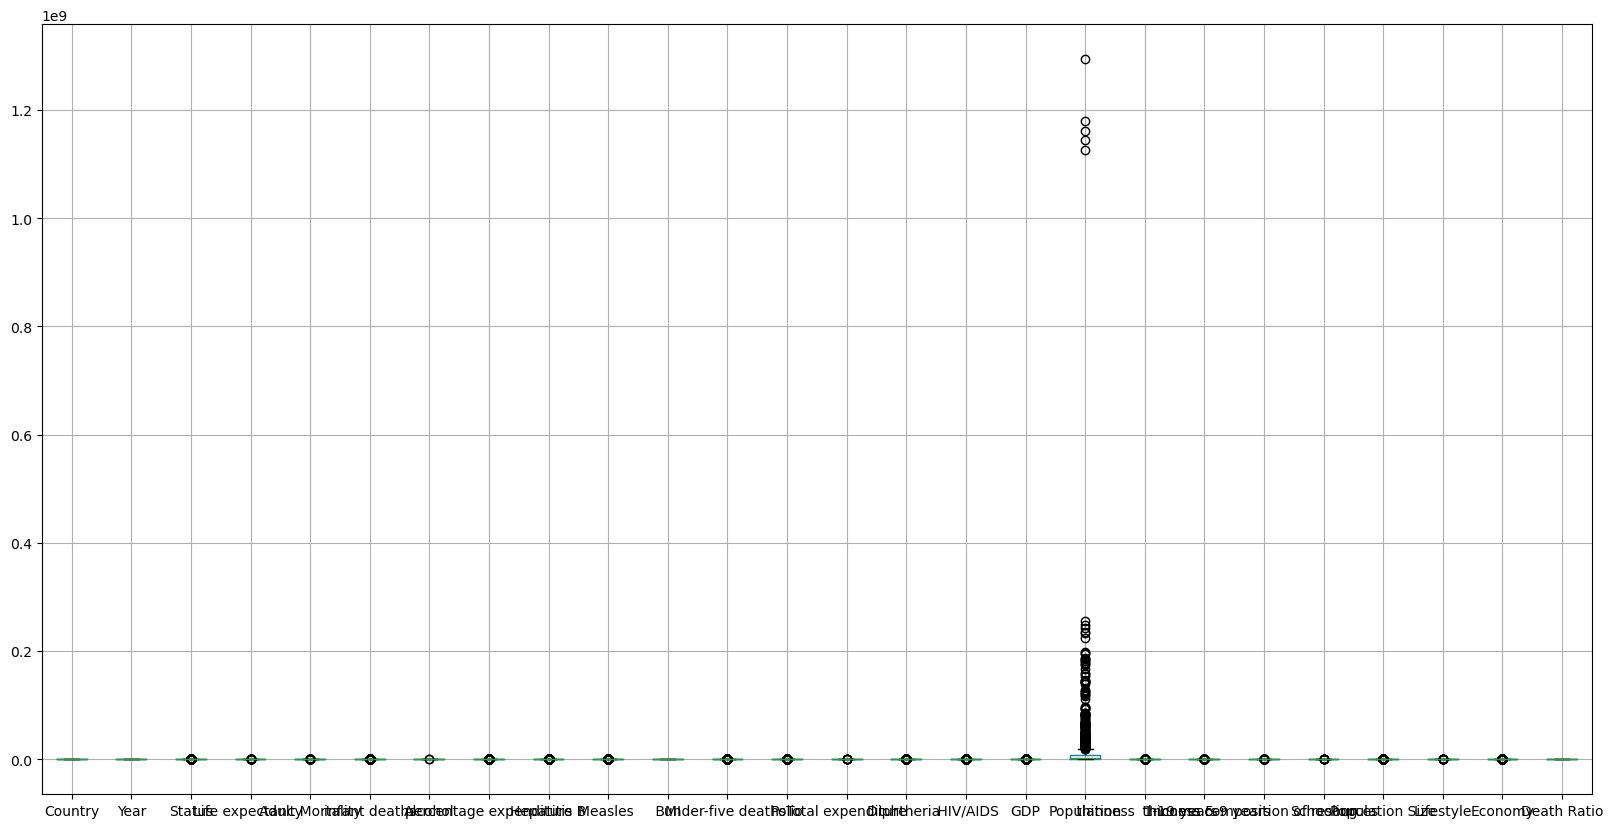

In [33]:
plt.figure(figsize=(20,10))
Life_expect.boxplot()

In [34]:
lowerLimit = Life_expect['Population'].quantile(0.00)
upperLimit = Life_expect['Population'].quantile(0.80)
lowerLimit

1141.0

In [35]:
upperLimit

12630716.4

In [36]:
Life_expect['Population'] = Life_expect['Population'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Population'>

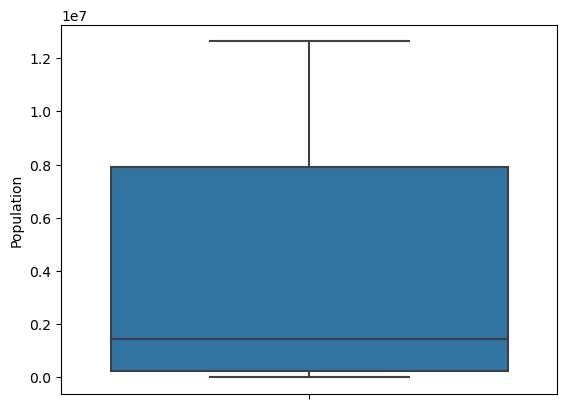

In [37]:
sns.boxplot(y='Population', data=Life_expect)

In [38]:
lowerLimit = Life_expect['Life expectancy '].quantile(0.03)
upperLimit = Life_expect['Life expectancy '].quantile(0.99)
lowerLimit

49.569

In [39]:
upperLimit

86.0

In [40]:
Life_expect['Life expectancy '] = Life_expect['Life expectancy '].clip(lowerLimit, upperLimit)

<Axes: ylabel='Life expectancy '>

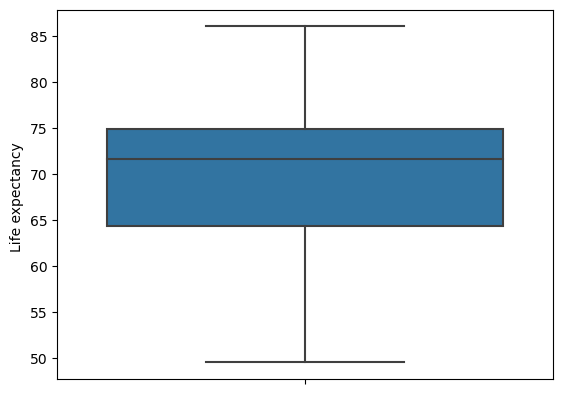

In [41]:
sns.boxplot(y='Life expectancy ', data=Life_expect)

In [42]:
lowerLimit = Life_expect['Adult Mortality'].quantile(0.05)
upperLimit = Life_expect['Adult Mortality'].quantile(0.88)
lowerLimit

13.0

In [43]:
upperLimit

294.24

In [44]:
Life_expect['Adult Mortality'] = Life_expect['Adult Mortality'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Adult Mortality'>

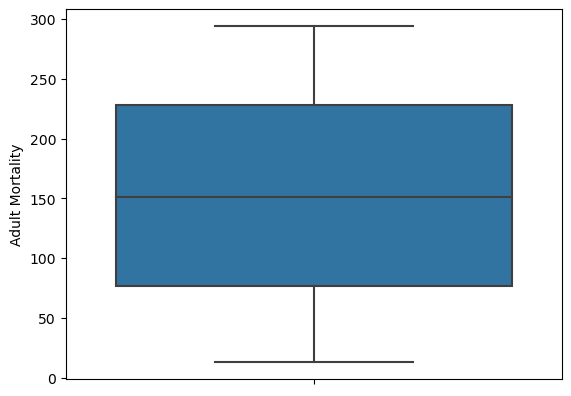

In [45]:
sns.boxplot(y='Adult Mortality', data=Life_expect)                           

In [46]:
lowerLimit = Life_expect['infant deaths'].quantile(0.05)
upperLimit = Life_expect['infant deaths'].quantile(0.88)
lowerLimit

0.0

In [47]:
upperLimit

54.0

In [48]:
Life_expect['infant deaths'] = Life_expect['infant deaths'].clip(lowerLimit, upperLimit)

<Axes: ylabel='infant deaths'>

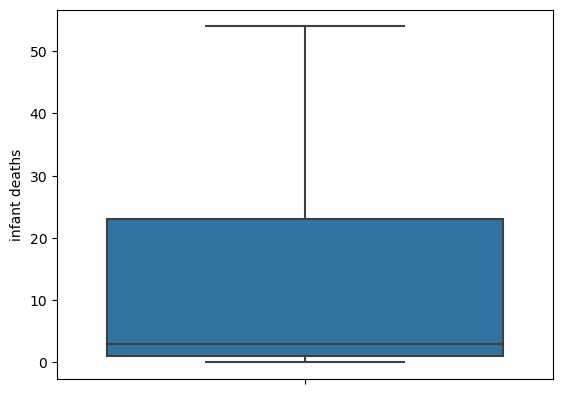

In [49]:
sns.boxplot(y='infant deaths', data=Life_expect)   

In [50]:
lowerLimit = Life_expect['Alcohol'].quantile(0.00)
upperLimit = Life_expect['Alcohol'].quantile(0.99)
lowerLimit

0.01

In [51]:
upperLimit

14.182399999999998

In [52]:
Life_expect['Alcohol'] = Life_expect['Alcohol'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Alcohol'>

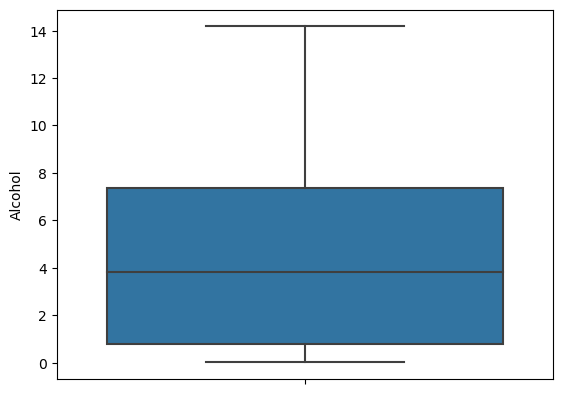

In [53]:
sns.boxplot(y='Alcohol', data=Life_expect)   

In [54]:
lowerLimit = Life_expect['percentage expenditure'].quantile(0.00)
upperLimit = Life_expect['percentage expenditure'].quantile(0.83)
lowerLimit

0.0

In [55]:
upperLimit

771.3337126029999

In [56]:
Life_expect['percentage expenditure'] = Life_expect['percentage expenditure'].clip(lowerLimit, upperLimit)

<Axes: ylabel='percentage expenditure'>

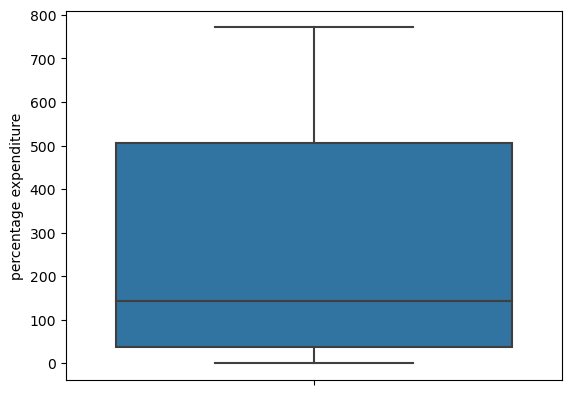

In [57]:
sns.boxplot(y='percentage expenditure', data=Life_expect)   

In [58]:
lowerLimit = Life_expect['Hepatitis B'].quantile(0.11)
upperLimit = Life_expect['Hepatitis B'].quantile(0.99)
lowerLimit

44.0

In [59]:
upperLimit

99.0

In [60]:
Life_expect['Hepatitis B'] = Life_expect['Hepatitis B'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Hepatitis B'>

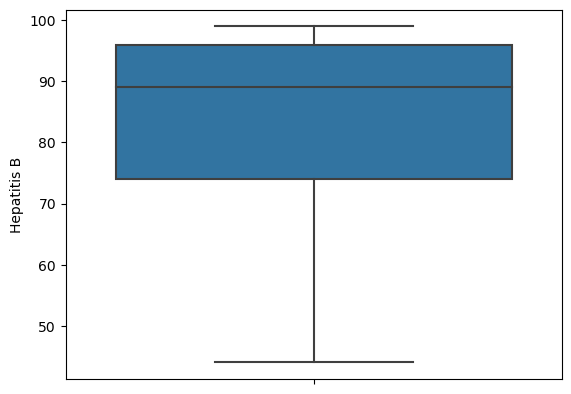

In [61]:
sns.boxplot(y='Hepatitis B', data=Life_expect)   

In [62]:
lowerLimit = Life_expect['Measles '].quantile(0.05)
upperLimit = Life_expect['Measles '].quantile(0.80)
lowerLimit

0.0

In [63]:
upperLimit

778.4000000000001

In [64]:
Life_expect['Measles '] = Life_expect['Measles '].clip(lowerLimit, upperLimit)

<Axes: ylabel='Measles '>

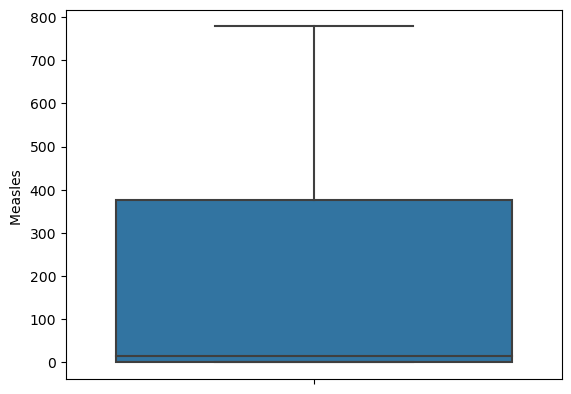

In [65]:
sns.boxplot(y='Measles ', data=Life_expect)   

In [66]:
lowerLimit = Life_expect['GDP'].quantile(0.05)
upperLimit = Life_expect['GDP'].quantile(0.87)
lowerLimit

76.54059890500001

In [67]:
upperLimit

9679.84085375

In [68]:
Life_expect['GDP'] = Life_expect['GDP'].clip(lowerLimit, upperLimit)

<Axes: ylabel='GDP'>

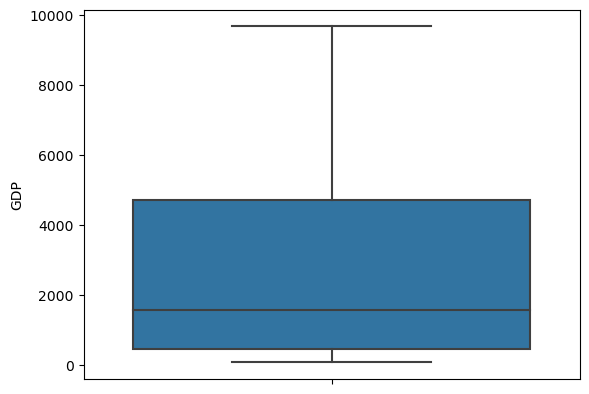

In [69]:
sns.boxplot(y='GDP', data=Life_expect)

In [70]:
lowerLimit = Life_expect['Income composition of resources'].quantile(0.05)
upperLimit = Life_expect['Income composition of resources'].quantile(0.99)
lowerLimit

0.35614999999999997

In [71]:
upperLimit

0.91177

In [72]:
Life_expect['Income composition of resources'] = Life_expect['Income composition of resources'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Income composition of resources'>

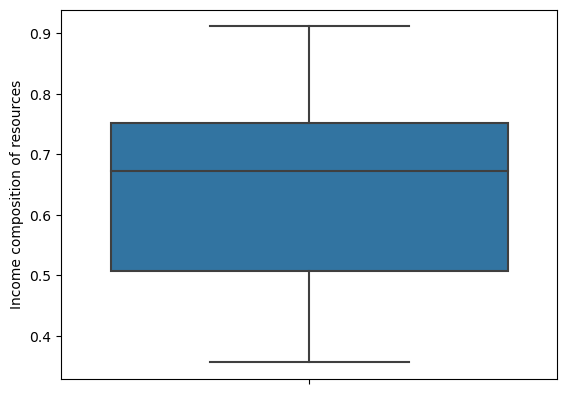

In [73]:
sns.boxplot(y='Income composition of resources', data=Life_expect)

In [74]:
#Split the remaining data into around 75% for training and 25% for the test set. Train the linear regression model 
#and assess the performance on the training set, test set, and the entire dataset.
#For assessing model performance, use various metrics such as Root Mean Square Error 

In [75]:
Life_expect

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population Size,Lifestyle,Economy,Death Ratio
0,0,2015,1,65.000,263.00,54,0.01,71.279624,65.0,778.4,...,584.259210,12630716.4,17.2,17.3,0.479,10.1,0,0.191,0.000017,4.241935
1,0,2014,1,59.900,271.00,54,0.01,73.523582,62.0,492.0,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0.186,0.001870,4.234375
2,0,2013,1,59.900,268.00,54,0.01,73.219243,64.0,430.0,...,631.744976,12630716.4,17.7,17.7,0.470,9.9,0,0.181,0.000020,4.060606
3,0,2012,1,59.500,272.00,54,0.01,78.184215,67.0,778.4,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0.176,0.000181,3.942029
4,0,2011,1,59.200,275.00,54,0.01,7.097109,68.0,778.4,...,76.540599,2978599.0,18.2,18.2,0.454,9.5,0,0.172,0.000021,3.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,131,2004,1,49.569,294.24,27,4.36,0.000000,68.0,31.0,...,454.366654,12630716.4,9.4,9.4,0.407,9.2,0,118.156,0.000036,26.777778
2934,131,2003,1,49.569,294.24,26,4.06,0.000000,44.0,778.4,...,453.351155,12630716.4,9.8,9.9,0.418,9.5,0,108.402,0.000036,27.500000
2935,131,2002,1,49.569,73.00,25,4.43,0.000000,73.0,304.0,...,76.540599,125525.0,1.2,1.3,0.427,10.0,0,116.509,0.000457,2.920000
2936,131,2001,1,49.569,294.24,25,1.72,0.000000,76.0,529.0,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,44.548,0.000044,27.440000


In [76]:
Life_expect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 2937
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1624 non-null   int32  
 1   Year                             1624 non-null   int64  
 2   Status                           1624 non-null   int32  
 3   Life expectancy                  1624 non-null   float64
 4   Adult Mortality                  1624 non-null   float64
 5   infant deaths                    1624 non-null   int64  
 6   Alcohol                          1624 non-null   float64
 7   percentage expenditure           1624 non-null   float64
 8   Hepatitis B                      1624 non-null   float64
 9   Measles                          1624 non-null   float64
 10   BMI                             1624 non-null   float64
 11  under-five deaths                1624 non-null   int64  
 12  Polio                    

In [77]:
Life_expect.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population Size',
       'Lifestyle', 'Economy', 'Death Ratio'],
      dtype='object')

In [137]:
Life_expect['Death Ratio'].unique()

array([4.24193548e+00, 4.23437500e+00, 4.06060606e+00, 3.94202899e+00,
       3.87323944e+00, 3.77027027e+00, 3.64935065e+00, 3.58750000e+00,
       3.59756098e+00, 3.51190476e+00, 3.42352941e+00, 3.36781609e+00,
       3.39080460e+00, 3.40909091e-02, 3.59090909e+00, 3.64772727e+00,
       4.26952182e+01, 9.10000000e+01, 1.00000000e+00, 9.00000000e+00,
       9.90000000e+01, 1.50000000e+01, 1.70000000e+01, 1.80000000e+01,
       1.40000000e+01, 1.10000000e+01, 5.23809524e-01, 5.33333333e+00,
       5.38095238e+00, 5.52380952e+00, 5.66666667e+00, 6.15000000e+00,
       6.30000000e+00, 6.45000000e+00, 6.60000000e+00, 7.15789474e+00,
       7.36842105e-01, 5.19402985e+00, 5.14492754e+00, 4.97222222e+00,
       4.81333333e+00, 4.67948718e+00, 4.55555556e+00, 4.41666667e+00,
       4.31034483e+00, 1.47500000e+01, 1.48750000e+01, 1.33333333e+00,
       1.21000000e+01, 1.26000000e+01, 1.29000000e+01, 1.15454545e+01,
       1.18181818e+00, 1.24545455e+01, 1.15000000e+01, 1.20000000e+01,
      

In [139]:
#To replace infinity value with nan
Life_expect['Death Ratio'] = Life_expect['Death Ratio'].replace([np.inf, -np.inf], np.nan)

In [140]:
#To replace the nan with mean
mean_death = Life_expect['Death Ratio'].dropna().mean()


In [141]:
Life_expect['Death Ratio'] =Life_expect['Death Ratio'].fillna(mean_death)

In [123]:
X = Life_expect[['Country','Year','Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population Size','Lifestyle','Economy','Death Ratio'
       ]].values

In [142]:
#To normalize
np.any(np.isnan(X))

True

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)



In [132]:
X

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.64922761e-04, 8.22421272e-07, 1.21328060e-02],
       [0.00000000e+00, 9.33333333e-01, 1.00000000e+00, ...,
        1.60100458e-04, 8.91676502e-05, 1.21111736e-02],
       [0.00000000e+00, 8.66666667e-01, 1.00000000e+00, ...,
        1.55278155e-04, 9.45932405e-07, 1.16139784e-02],
       ...,
       [1.00000000e+00, 1.33333333e-01, 1.00000000e+00, ...,
        1.12349050e-01, 2.17782860e-05, 8.35042743e-03],
       [1.00000000e+00, 6.66666667e-02, 1.00000000e+00, ...,
        4.29455012e-02, 2.11174794e-06, 7.85081039e-02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.12982025e-02, 2.13185964e-06, 7.92758708e-02]])

In [143]:
Y = Life_expect['Life expectancy ']

In [153]:
#To replace NAN
X = np.nan_to_num(X, nan=np.nanmean(X))

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [156]:
#Training the model
reglin = LinearRegression()
reglin.fit(X_train,Y_train) 

LinearRegression()

In [157]:
#Make a prediction
Y_pred = reglin.predict(X_test)

<Axes: xlabel='Life expectancy '>

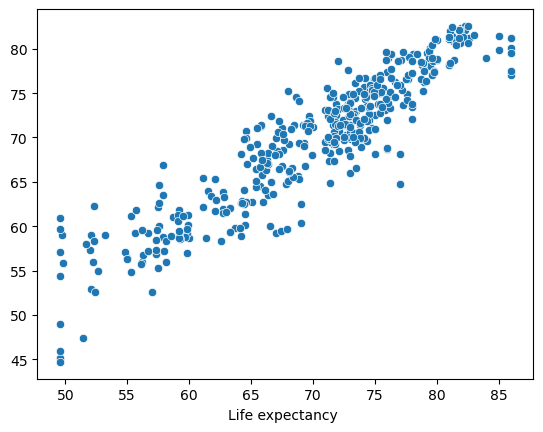

In [159]:
sns.scatterplot(x=Y_test, y=Y_pred)

In [160]:
# Assess the performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [161]:
mse

10.46047890650163

In [162]:
r2

0.8480400320438715

C:\Users\visit\AppData\Local\Temp\ipykernel_18456\267951818.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-Y_pred),bins=50)


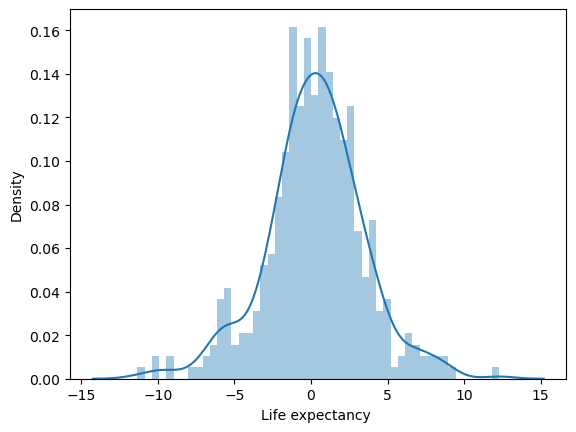

In [164]:
# Draw residual histogram
sns.distplot((Y_test-Y_pred),bins=50)
plt.show()